In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
data = pd.read_csv('../input/titanic/train.csv')

In [163]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


PassengerId : SEQなので削除する

Name         : Mr,Missなど同じ敬称がみられるため、特徴量Initialとする

Ticket:数字部分をTNumeric,数字部分の文字数をTNlen,数字部分の1文字目をLeadingDigitとする

Cabin         : 特徴量Embarkedと特徴量Roomに分ける

In [164]:
# -----------------------------------
# 特徴量作成
# -----------------------------------
from sklearn.preprocessing import LabelEncoder

# 変数PassengerIdを除外する
data = data.drop(['PassengerId'], axis=1)

# 変数Initialを追加する
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

# 変数Ticketを置換する
data['Ticket'] = data['Ticket'].replace('LINE','LINE 0')
data['Ticket'] = data['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
def get_prefix(ticket):
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'

# 変数TNumericを追加する
data['TNumeric'] = data['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)

# 変数TNlenを追加する
data['TNlen'] = data['TNumeric'].apply(lambda x : len(str(x)))

# 変数LeadingDigitを追加する
data['LeadingDigit'] = data['TNumeric'].apply(lambda x : int(str(x)[0]))

# 変数Deckを追加する
data['Deck']=0
for i in data:
    data['Deck']=data["Cabin"].str.slice(0,1)
    
# 変数Roomを追加する
data['Room']=0
for i in data:
    data['Room']=data["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False)

In [165]:
data.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,TNumeric,TNlen,LeadingDigit,Deck,Room
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,a5 21171,7.2500,NaN,S,Mr,21171,5,2,NaN,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,pc 17599,71.2833,C85,C,Mrs,17599,5,1,C,85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,stono2 3101282,7.9250,NaN,S,Miss,3101282,7,3,NaN,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,113803,6,1,C,123
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,373450,6,3,NaN,NaN
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,330877,6,3,NaN,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,17463,5,1,E,46
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,349909,6,3,NaN,NaN
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,347742,6,3,NaN,NaN
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,237736,6,2,NaN,NaN


男女別での生き残りやすさの比較

男性は比較的生き残りにくく、女性は比較的生き残りやすい

In [166]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

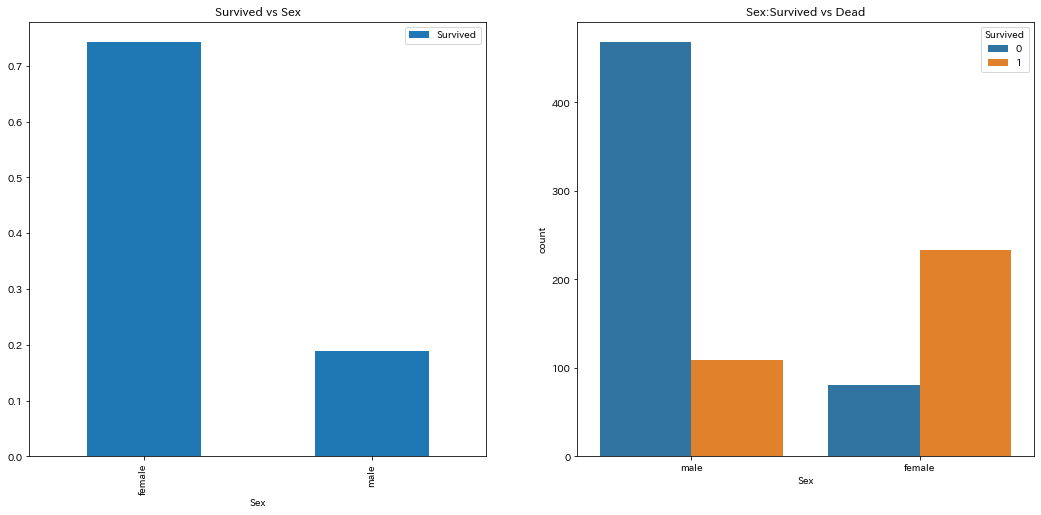

In [167]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

敬称ごとの人数

In [168]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


敬称ごとの生き残りやすさの比較

Mr,Mrs,Msには生死に大きな差が出ている

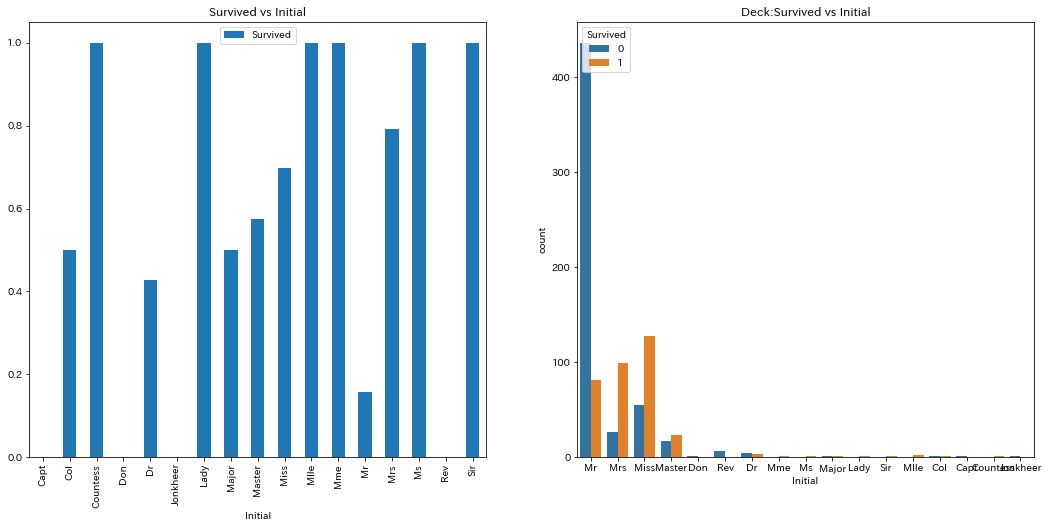

In [169]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Initial','Survived']].groupby(['Initial']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Initial')
sns.countplot('Initial',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Deck:Survived vs Initial')
plt.show()

Deckごとの生き残りやすさの比較

DeckのAとGでは生死の割合が五分五分である

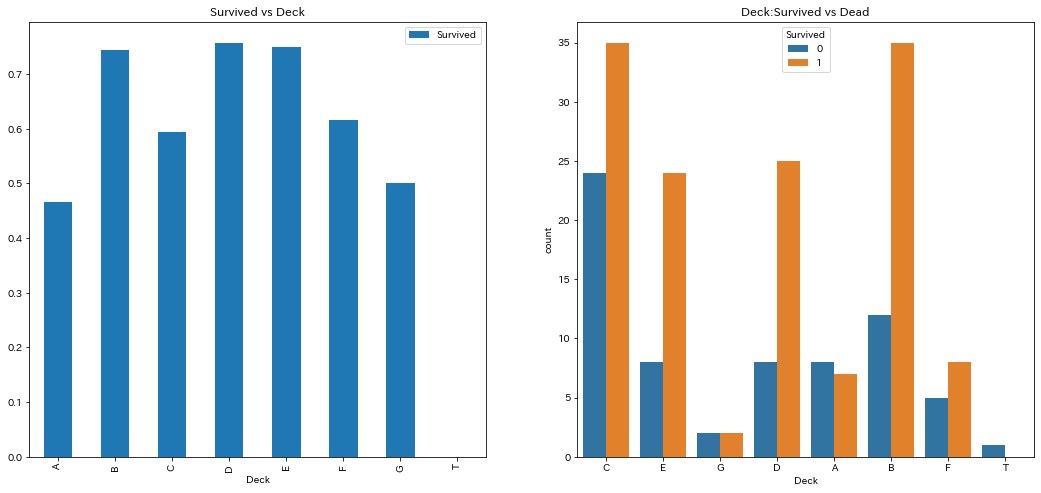

In [170]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Deck','Survived']].groupby(['Deck']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Deck')
sns.countplot('Deck',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Deck:Survived vs Dead')
plt.show()

Deckごとの男女別での生き残りやすさの比較

DeckがBからEの女性は比較的生存率が高い

In [171]:
pd.crosstab([data.Sex,data.Survived], data.Deck, normalize='index').style.background_gradient(cmap='summer_r') #Checking the Deck with the Sex

In [172]:
pd.crosstab([data.Sex,data.Survived], data.Deck).style.background_gradient(cmap='summer_r') #Checking the Deck with the Sex

Roomごとの生き残りやすさの比較

Roomは種類が多すぎるため、特徴量に含めない

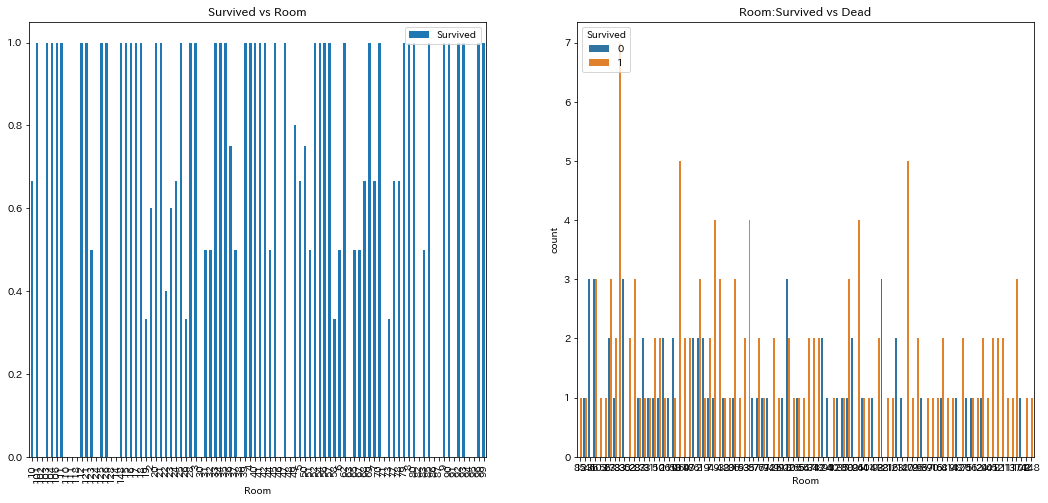

In [173]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Room','Survived']].groupby(['Room']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Room')
sns.countplot('Room',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Room:Survived vs Dead')
plt.show()

In [174]:
# 変数Name, Ticket, Cabinを除外する
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# それぞれのカテゴリ変数にlabel encodingを適用する
for c in ['Sex', 'Embarked', 'Initial', 'Deck', 'Room']:
    # 学習データに基づいてどう変換するかを定める
    le = LabelEncoder()
    le.fit(data[c].fillna('NA'))

    # 学習データ、テストデータを変換する
    data[c] = le.transform(data[c].fillna('NA'))

カラムごとの相関関係

Sexが生死に一番関係している

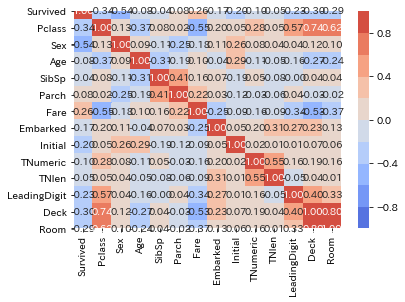

In [175]:
sns.heatmap(data.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)